In [1]:
import pickle
from os import listdir
from os.path import isfile, join
import sys
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
mypath =  "../../Downloads/bigdata1_dataset_CS298/malware_dict/"

In [3]:
directories = listdir("../../Downloads/bigdata1_dataset_CS298/malware_dict/")

In [4]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [5]:
for directory in directories:
    pathToDir = mypath+directory+"/"
    with open(pathToDir+"top.txt",'rb') as f:
        dictionary = pickle.load(f,encoding='latin1')
        print(len(dictionary))
        

1500
921
1500
1500
1169
1500
1500
1500
336
1500
1500
1500
1500
1500
1500
1012
1500
985
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500
1500


In [6]:
print(len(directories))

29


In [7]:
count = 0
for directory in directories:
    pathToDir = mypath+directory+"/"
    onlyfiles = [f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
    print(directory +" & " +str(len(onlyfiles)) + " \\" + "\\")
    count = count+len(onlyfiles)
print(count)

vobfus & 1001 \\
lolyda & 1001 \\
ceeinject & 1001 \\
cycbot & 1001 \\
bho & 1001 \\
zbot & 1002 \\
lollipop & 1001 \\
fakerean & 1001 \\
kelihos & 1001 \\
alureon & 1001 \\
ramnit & 1001 \\
hupigon & 1001 \\
winwebsec & 1002 \\
renos & 1001 \\
vundo & 1001 \\
hotbar & 1001 \\
vbinject & 1001 \\
adload & 1001 \\
bifrose & 1001 \\
agent & 1001 \\
startpage & 1001 \\
delfinject & 1001 \\
obfuscator & 1001 \\
zeroaccess & 1002 \\
zegost & 1001 \\
rbot & 1001 \\
gatak & 1001 \\
onlinegames & 1001 \\
injector & 1001 \\
29032


In [8]:
# Dictionary = {}
# flag = 0
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     with open(pathToDir+"top.txt",'rb') as f:
#         d = pickle.load(f,encoding='latin1')
#         if flag == 0:
#             Dictionary = d
#             flag = 1
#         else :
#             for key,value in d.items():
#                 if key in Dictionary:
#                     Dictionary[key] = Dictionary[key] + value
#                 else :
#                     Dictionary[key] = value

In [9]:
# K = 1000

In [10]:
# featureVectorTopK = sorted(Dictionary.items(), key=lambda kv: kv[1],reverse=True)[:K]

In [11]:
# print(featureVectorTopK)

In [12]:
# dataset = []
# for directory in directories:
#     pathToDir = mypath+directory+"/"
#     fileName = [pathToDir+f for f in listdir(pathToDir) if isfile(join(pathToDir, f))]
#     for filePath in fileName:
#         dictionaryOfNgram = {}
#         with open(filePath,"rb") as f:
#             dictionaryOfNgram = pickle.load(f,encoding='latin1')
#         vectorForSample = []
#         for ngram_tuple in featureVectorTopK:
#             if (ngram_tuple[0] in dictionaryOfNgram.keys()):
#                 vectorForSample.append(dictionaryOfNgram[ngram_tuple[0]])
#             else:
#                 vectorForSample.append(0)
#         sumOfRow = sum(vectorForSample)
#         for i in range(0,len(vectorForSample)):
#             vectorForSample[i] = float(vectorForSample[i]) / sumOfRow
#         vectorForSample = [directory] + vectorForSample
#         dataset.append(vectorForSample)

In [13]:
# print(len(dataset))

In [14]:
# print(dataset[0])

In [15]:
# print(dataset)

In [16]:
# dataset_Tmp = pd.DataFrame(dataset,columns=["Family Name"]+[i for i in range(1,K+1)])
# dataset_Tmp.to_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")

In [ ]:
dataset_dataframe = pd.read_csv("../dataset/bigdata1/top1000_bigdata1.csv",sep="\t")
dataset_dataframe.head()

In [ ]:
dataset = np.array(dataset_dataframe.iloc[:,2:])

In [ ]:
print(len(dataset))

In [ ]:
y = np.array(dataset_dataframe.loc[:,"Family Name"])

In [ ]:
TopFamilyName = ['vobfus', 'lolyda', 'ceeinject', 'cycbot', 'bho', 'fakerean', 'alureon', 'renos', 'vundo', 'hotbar', 'adload', 'agent', 'startpage', 'delfinject', 'obfuscator', 'rbot', 'onlinegames']
topfam = set(TopFamilyName) 
label = []
for familyname in y:
    if familyname in topfam:
        for name_index in range(0,len(TopFamilyName)):
            if familyname == TopFamilyName[name_index]:
                label.append(name_index)
    else :
        label.append(len(TopFamilyName))
label = np.array(label)

In [ ]:
print(len(dataset))

In [ ]:
# avg_scores_knn = [0 for i in range(0,10)]
# n_itr = 5
# for itr in range(0,n_itr):
#     # Dividing the dataset into various sub-dataset
#     skf = StratifiedKFold(n_splits=10,shuffle=True)
#     subDatasetIndex = []
#     for train_index, test_index in skf.split(dataset,label):
#         subDatasetIndex.append(test_index)
#     # Verifying the whether the total is equal to total dataset
#     sum = 0;
#     for elem in subDatasetIndex:
#         print(len(elem))
#         sum = sum+len(elem)

#     MeanScoreForAll = []
#     sizeOfEachDataset = []
#     for i in range(1,11):
#         X = []
#         Y = []
#         tmp_sizeOfEachDataset_sum = 0;
#         for j in range (0,i):
#             tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
#             for rowIndex in subDatasetIndex[j]:
#                 X.append(dataset[rowIndex])
#                 Y.append(label[rowIndex])
#         sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
#         X = np.array(X)
#         Y = np.array(Y)
#         mean_accuracy_array = []
#         k_range = range(1, 31)
#         k_scores = []
#         # 1. we will loop through reasonable values of k
#         for k in k_range:
#             # 2. run KNeighborsClassifier with k neighbours
#             knn = KNeighborsClassifier(n_neighbors=k)
#             # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
#             cv = StratifiedKFold(n_splits=10,shuffle=True)
#             scores = cross_val_score(knn, X, Y, cv=cv, scoring='accuracy')
#             # 4. append mean of scores for k neighbors to k_scores list
#             k_scores.append(scores.mean())
#         print("For i = " + str(i))
#         print("Scores For K ranging from 1 to 30 \n" + str(k_scores))
#         highestAccuracy_k = (k_scores.index(max(k_scores))+1)
#         print("K with highest accuracy and its accuracy : " + str(highestAccuracy_k) +" , " + str(k_scores[highestAccuracy_k-1]))
#         mean_accuracy_array.append(k_scores[highestAccuracy_k-1])
#         mean = np.mean(mean_accuracy_array)
#         MeanScoreForAll.append(mean)
#         print("Mean Accuracy : " + str(mean))
#         print("\n\n")
#     for i in range(0,len(MeanScoreForAll)):
#         avg_scores_knn[i] = avg_scores_knn[i]+MeanScoreForAll[i]

In [ ]:
# for score in avg_scores_knn:
#     print((score*100)/5)

In [ ]:
# tmp = avg_scores_knn
# for i in range(0,len(avg_scores_knn)):
#     avg_scores_knn[i] = avg_scores_knn[i] / n_itr
# print(avg_scores_knn)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.1)

In [ ]:
print(len(X_train[0]))

In [14]:
# Trial and error
# valuesOfEpochs = [5,10,50,100,200,500,1000]
# valuesOfTestSize = [0.1,0.2,0.3]
valuesOfEpochs = [500]
valuesOfTestSize = [0.2]
overAllY = []
n_itr = 5
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        sizeOfEachDataset = []
        accForVariousSize = [0 for i in range (0,10)]
        lossForVariousSize = [0 for i in range(0,10)]
        for itr in range(0,n_itr):
            print(str(v) + ", "+str(e) + ", "+str(itr))
            # Dividing the dataset into various sub-dataset
            skf = StratifiedKFold(n_splits=10,shuffle=True)
            subDatasetIndex = []
            for train_index, test_index in skf.split(dataset,label):
                subDatasetIndex.append(test_index)
                
            for i in range(1,11):
                print("------" + str(i) + "--------")
                X = []
                Y = []
                tmp_sizeOfEachDataset_sum = 0;
                for j in range (0,i):
                    tmp_sizeOfEachDataset_sum = tmp_sizeOfEachDataset_sum + len(subDatasetIndex[j])
                    for rowIndex in subDatasetIndex[j]:
                        X.append(dataset[rowIndex])
                        Y.append(label[rowIndex])
                sizeOfEachDataset.append(tmp_sizeOfEachDataset_sum)
                X = np.array(X)
                Y = np.array(Y)
                X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=v)
                model = keras.Sequential()
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal',input_dim=1000))
                model.add(keras.layers.Dense(128,activation='relu',kernel_initializer='random_normal'))
                model.add(keras.layers.Dense(17, activation='softmax', kernel_initializer='random_normal'))
                model.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=e)
                loss, acc = model.evaluate(X_test,y_test)
                accForVariousSize[i-1] = accForVariousSize[i-1] + acc
                lossForVariousSize[i-1] = lossForVariousSize[i-1] + loss
        print(accForVariousSize)
            
        for i in range(0,10):
            accForVariousSize[i] = accForVariousSize[i] / n_itr
            lossForVariousSize[i] = lossForVariousSize[i] / n_itr
        overAllY.append(accForVariousSize)

0.2, 200, 0
------1--------
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/200
1373/1373 [==============================] - 0s 269us/sample - loss: 2.8224 - acc: 0.1282
Epoch 2/200
1373/1373 [==============================] - 0s 175us/sample - loss: 2.6878 - acc: 0.2229
Epoch 3/200
1373/1373 [==============================] - 0s 170us/sample - loss: 2.3429 - acc: 0.2600
Epoch 4/200
1373/1373 [==============================] - 0s 171us/sample - loss: 2.0958 - acc: 0.3700
Epoch 5/200
1373/1373 [==============================] - 0s 156us/sample - loss: 1.9150 - acc: 0.3977
Epoch 6/200
1373/1373 [==============================] - 0s 158us/sample - loss: 1.7638 - acc: 0.4312
Epoch 7/200
1373/1373 [==============================] - 0s 164us/sample - loss: 1.6437 - acc: 0.4916
Epoch 8/200
1373/1373 [==============================] - 0s 154us/sample - loss: 1.5549 - acc: 0.5113
Epoch 9/200
1373/1373 [==============================] - 0s 161us/sample - loss: 1.4

1373/1373 [==============================] - 0s 333us/sample - loss: 0.0367 - acc: 0.9891
Epoch 157/200
1373/1373 [==============================] - 0s 303us/sample - loss: 0.0323 - acc: 0.9934
Epoch 158/200
1373/1373 [==============================] - 0s 310us/sample - loss: 0.0374 - acc: 0.9891
Epoch 159/200
1373/1373 [==============================] - 0s 341us/sample - loss: 0.0367 - acc: 0.9898
Epoch 160/200
1373/1373 [==============================] - 1s 393us/sample - loss: 0.0332 - acc: 0.9905
Epoch 161/200
1373/1373 [==============================] - 1s 394us/sample - loss: 0.0299 - acc: 0.9934
Epoch 162/200
1373/1373 [==============================] - 0s 327us/sample - loss: 0.0335 - acc: 0.9905
Epoch 163/200
1373/1373 [==============================] - 0s 299us/sample - loss: 0.0338 - acc: 0.9891
Epoch 164/200
1373/1373 [==============================] - 0s 335us/sample - loss: 0.0291 - acc: 0.9956
Epoch 165/200
1373/1373 [==============================] - 0s 292us/sample - l

Epoch 113/200
2733/2733 [==============================] - 1s 240us/sample - loss: 0.0627 - acc: 0.9850
Epoch 114/200
2733/2733 [==============================] - 1s 240us/sample - loss: 0.0544 - acc: 0.9876
Epoch 115/200
2733/2733 [==============================] - 1s 239us/sample - loss: 0.0545 - acc: 0.9857
Epoch 116/200
2733/2733 [==============================] - 1s 231us/sample - loss: 0.0522 - acc: 0.9876
Epoch 117/200
2733/2733 [==============================] - 1s 233us/sample - loss: 0.0520 - acc: 0.9861
Epoch 118/200
2733/2733 [==============================] - 1s 257us/sample - loss: 0.0582 - acc: 0.9839
Epoch 119/200
2733/2733 [==============================] - 1s 268us/sample - loss: 0.0497 - acc: 0.9890
Epoch 120/200
2733/2733 [==============================] - 1s 230us/sample - loss: 0.0521 - acc: 0.9850
Epoch 121/200
2733/2733 [==============================] - 1s 220us/sample - loss: 0.0515 - acc: 0.9854
Epoch 122/200
2733/2733 [==============================] - 1s 23

4093/4093 [==============================] - 1s 262us/sample - loss: 0.1324 - acc: 0.9646
Epoch 70/200
4093/4093 [==============================] - 1s 262us/sample - loss: 0.1291 - acc: 0.9670
Epoch 71/200
4093/4093 [==============================] - 1s 258us/sample - loss: 0.1256 - acc: 0.9660
Epoch 72/200
4093/4093 [==============================] - 1s 249us/sample - loss: 0.1249 - acc: 0.9658
Epoch 73/200
4093/4093 [==============================] - 1s 294us/sample - loss: 0.1171 - acc: 0.9675
Epoch 74/200
4093/4093 [==============================] - 1s 258us/sample - loss: 0.1148 - acc: 0.9702
Epoch 75/200
4093/4093 [==============================] - 1s 255us/sample - loss: 0.1124 - acc: 0.9712
Epoch 76/200
4093/4093 [==============================] - 1s 283us/sample - loss: 0.1140 - acc: 0.9687
Epoch 77/200
4093/4093 [==============================] - 1s 256us/sample - loss: 0.1058 - acc: 0.9724
Epoch 78/200
4093/4093 [==============================] - 1s 252us/sample - loss: 0.10

5453/5453 [==============================] - 2s 287us/sample - loss: 0.3899 - acc: 0.8880
Epoch 27/200
5453/5453 [==============================] - 1s 269us/sample - loss: 0.3727 - acc: 0.8916
Epoch 28/200
5453/5453 [==============================] - 1s 271us/sample - loss: 0.3687 - acc: 0.8935
Epoch 29/200
5453/5453 [==============================] - 2s 301us/sample - loss: 0.3557 - acc: 0.8958
Epoch 30/200
5453/5453 [==============================] - 1s 271us/sample - loss: 0.3409 - acc: 0.8997
Epoch 31/200
5453/5453 [==============================] - 1s 255us/sample - loss: 0.3357 - acc: 0.9045
Epoch 32/200
5453/5453 [==============================] - 1s 271us/sample - loss: 0.3215 - acc: 0.9037
Epoch 33/200
5453/5453 [==============================] - 1s 271us/sample - loss: 0.3149 - acc: 0.9092
Epoch 34/200
5453/5453 [==============================] - 1s 264us/sample - loss: 0.3058 - acc: 0.9118
Epoch 35/200
5453/5453 [==============================] - 2s 275us/sample - loss: 0.30

5453/5453 [==============================] - 1s 259us/sample - loss: 0.0276 - acc: 0.9917
Epoch 184/200
5453/5453 [==============================] - 1s 265us/sample - loss: 0.0290 - acc: 0.9912
Epoch 185/200
5453/5453 [==============================] - 1s 273us/sample - loss: 0.0266 - acc: 0.9927
Epoch 186/200
5453/5453 [==============================] - 1s 264us/sample - loss: 0.0257 - acc: 0.9932
Epoch 187/200
5453/5453 [==============================] - 1s 266us/sample - loss: 0.0276 - acc: 0.9914
Epoch 188/200
5453/5453 [==============================] - 1s 262us/sample - loss: 0.0301 - acc: 0.9912
Epoch 189/200
5453/5453 [==============================] - 2s 275us/sample - loss: 0.0394 - acc: 0.9870
Epoch 190/200
5453/5453 [==============================] - 1s 257us/sample - loss: 0.0278 - acc: 0.9923
Epoch 191/200
5453/5453 [==============================] - 1s 265us/sample - loss: 0.0270 - acc: 0.9921
Epoch 192/200
5453/5453 [==============================] - 1s 275us/sample - l

6813/6813 [==============================] - 2s 263us/sample - loss: 0.0430 - acc: 0.9897
Epoch 141/200
6813/6813 [==============================] - 2s 254us/sample - loss: 0.0435 - acc: 0.9883
Epoch 142/200
6813/6813 [==============================] - 2s 259us/sample - loss: 0.0418 - acc: 0.9888
Epoch 143/200
6813/6813 [==============================] - 2s 274us/sample - loss: 0.0489 - acc: 0.9869
Epoch 144/200
6813/6813 [==============================] - 2s 265us/sample - loss: 0.0426 - acc: 0.9893
Epoch 145/200
6813/6813 [==============================] - 2s 259us/sample - loss: 0.0375 - acc: 0.9910
Epoch 146/200
6813/6813 [==============================] - 2s 260us/sample - loss: 0.0400 - acc: 0.9902
Epoch 147/200
6813/6813 [==============================] - 2s 267us/sample - loss: 0.0429 - acc: 0.9887
Epoch 148/200
6813/6813 [==============================] - 2s 263us/sample - loss: 0.0462 - acc: 0.9869
Epoch 149/200
6813/6813 [==============================] - 2s 255us/sample - l

8173/8173 [==============================] - 2s 304us/sample - loss: 0.0570 - acc: 0.9836
Epoch 98/200
8173/8173 [==============================] - 2s 295us/sample - loss: 0.0557 - acc: 0.9824
Epoch 99/200
8173/8173 [==============================] - 3s 307us/sample - loss: 0.0527 - acc: 0.9850
Epoch 100/200
8173/8173 [==============================] - 2s 303us/sample - loss: 0.0530 - acc: 0.9850
Epoch 101/200
8173/8173 [==============================] - 2s 299us/sample - loss: 0.0549 - acc: 0.9820
Epoch 102/200
8173/8173 [==============================] - 2s 297us/sample - loss: 0.0494 - acc: 0.9856
Epoch 103/200
8173/8173 [==============================] - 3s 307us/sample - loss: 0.0569 - acc: 0.9832
Epoch 104/200
8173/8173 [==============================] - 2s 304us/sample - loss: 0.0515 - acc: 0.9846
Epoch 105/200
8173/8173 [==============================] - 2s 306us/sample - loss: 0.0477 - acc: 0.9859
Epoch 106/200
8173/8173 [==============================] - 3s 311us/sample - los

Epoch 176/200
8173/8173 [==============================] - 3s 349us/sample - loss: 0.0297 - acc: 0.9911
Epoch 177/200
8173/8173 [==============================] - 3s 339us/sample - loss: 0.0265 - acc: 0.9916
Epoch 178/200
8173/8173 [==============================] - 3s 331us/sample - loss: 0.0261 - acc: 0.9922
Epoch 179/200
8173/8173 [==============================] - 3s 339us/sample - loss: 0.0244 - acc: 0.9925
Epoch 180/200
8173/8173 [==============================] - 3s 335us/sample - loss: 0.0273 - acc: 0.9927
Epoch 181/200
8173/8173 [==============================] - 3s 348us/sample - loss: 0.0275 - acc: 0.9918
Epoch 182/200
8173/8173 [==============================] - ETA: 0s - loss: 0.0256 - acc: 0.992 - 3s 335us/sample - loss: 0.0260 - acc: 0.9928
Epoch 183/200
8173/8173 [==============================] - 3s 333us/sample - loss: 0.0351 - acc: 0.9894
Epoch 184/200
8173/8173 [==============================] - 3s 341us/sample - loss: 0.0252 - acc: 0.9928
Epoch 185/200
8173/8173 [=

Epoch 54/200
9533/9533 [==============================] - 3s 323us/sample - loss: 0.1357 - acc: 0.9611
Epoch 55/200
9533/9533 [==============================] - 3s 343us/sample - loss: 0.1288 - acc: 0.9632
Epoch 56/200
9533/9533 [==============================] - 3s 350us/sample - loss: 0.1239 - acc: 0.9655
Epoch 57/200
9533/9533 [==============================] - 3s 319us/sample - loss: 0.1259 - acc: 0.9629
Epoch 58/200
9533/9533 [==============================] - 3s 314us/sample - loss: 0.1205 - acc: 0.9646
Epoch 59/200
9533/9533 [==============================] - 3s 320us/sample - loss: 0.1197 - acc: 0.9651
Epoch 60/200
9533/9533 [==============================] - 3s 309us/sample - loss: 0.1151 - acc: 0.9675
Epoch 61/200
9533/9533 [==============================] - 3s 318us/sample - loss: 0.1108 - acc: 0.9674
Epoch 62/200
9533/9533 [==============================] - 3s 305us/sample - loss: 0.1099 - acc: 0.9680
Epoch 63/200
9533/9533 [==============================] - 3s 312us/sample

10893/10893 [==============================] - 3s 320us/sample - loss: 0.5324 - acc: 0.8462
Epoch 11/200
10893/10893 [==============================] - 4s 334us/sample - loss: 0.5059 - acc: 0.8570
Epoch 12/200
10893/10893 [==============================] - 4s 335us/sample - loss: 0.4794 - acc: 0.8627
Epoch 13/200
10893/10893 [==============================] - 4s 337us/sample - loss: 0.4573 - acc: 0.8684
Epoch 14/200
10893/10893 [==============================] - 4s 332us/sample - loss: 0.4355 - acc: 0.8758
Epoch 15/200
10893/10893 [==============================] - 4s 327us/sample - loss: 0.4171 - acc: 0.8816
Epoch 16/200
10893/10893 [==============================] - 3s 291us/sample - loss: 0.3948 - acc: 0.8879
Epoch 17/200
10893/10893 [==============================] - 3s 298us/sample - loss: 0.3794 - acc: 0.8913
Epoch 18/200
10893/10893 [==============================] - 3s 299us/sample - loss: 0.3631 - acc: 0.8993
Epoch 19/200
10893/10893 [==============================] - 3s 298us

10893/10893 [==============================] - 4s 327us/sample - loss: 0.0550 - acc: 0.9829
Epoch 89/200
10893/10893 [==============================] - 3s 310us/sample - loss: 0.0506 - acc: 0.9851
Epoch 90/200
10893/10893 [==============================] - 3s 318us/sample - loss: 0.0565 - acc: 0.9824
Epoch 91/200
10893/10893 [==============================] - 3s 319us/sample - loss: 0.0547 - acc: 0.9834
Epoch 92/200
10893/10893 [==============================] - 4s 335us/sample - loss: 0.0479 - acc: 0.9854
Epoch 93/200
10893/10893 [==============================] - 4s 329us/sample - loss: 0.0473 - acc: 0.9863
Epoch 94/200
10893/10893 [==============================] - 4s 327us/sample - loss: 0.0497 - acc: 0.9853
Epoch 95/200
10893/10893 [==============================] - 4s 326us/sample - loss: 0.0451 - acc: 0.9862
Epoch 96/200
10893/10893 [==============================] - 3s 320us/sample - loss: 0.0483 - acc: 0.9859
Epoch 97/200
10893/10893 [==============================] - 4s 327us

12253/12253 [==============================] - 4s 302us/sample - loss: 0.1576 - acc: 0.9532
Epoch 42/200
12253/12253 [==============================] - 4s 299us/sample - loss: 0.1527 - acc: 0.9556
Epoch 43/200
12253/12253 [==============================] - 4s 305us/sample - loss: 0.1548 - acc: 0.9528
Epoch 44/200
12253/12253 [==============================] - 4s 296us/sample - loss: 0.1438 - acc: 0.9554
Epoch 45/200
12253/12253 [==============================] - 4s 301us/sample - loss: 0.1403 - acc: 0.9567
Epoch 46/200
12253/12253 [==============================] - 4s 301us/sample - loss: 0.1351 - acc: 0.9598
Epoch 47/200
12253/12253 [==============================] - 4s 299us/sample - loss: 0.1318 - acc: 0.9597
Epoch 48/200
12253/12253 [==============================] - 4s 307us/sample - loss: 0.1297 - acc: 0.9605
Epoch 49/200
12253/12253 [==============================] - 4s 295us/sample - loss: 0.1290 - acc: 0.9600
Epoch 50/200
12253/12253 [==============================] - 4s 308us

Epoch 119/200
12253/12253 [==============================] - 4s 320us/sample - loss: 0.0399 - acc: 0.9878
Epoch 120/200
12253/12253 [==============================] - 4s 319us/sample - loss: 0.0366 - acc: 0.9877
Epoch 121/200
12253/12253 [==============================] - 4s 322us/sample - loss: 0.0328 - acc: 0.9890
Epoch 122/200
12253/12253 [==============================] - 4s 321us/sample - loss: 0.0435 - acc: 0.9866
Epoch 123/200
12253/12253 [==============================] - 4s 324us/sample - loss: 0.0372 - acc: 0.9889
Epoch 124/200
12253/12253 [==============================] - 4s 322us/sample - loss: 0.0342 - acc: 0.9889
Epoch 125/200
12253/12253 [==============================] - 4s 322us/sample - loss: 0.0367 - acc: 0.9884
Epoch 126/200
12253/12253 [==============================] - 4s 313us/sample - loss: 0.0357 - acc: 0.9877
Epoch 127/200
12253/12253 [==============================] - 4s 324us/sample - loss: 0.0356 - acc: 0.9885
Epoch 128/200
12253/12253 [===================

13613/13613 [==============================] - 4s 304us/sample - loss: 0.0717 - acc: 0.9783
Epoch 74/200
13613/13613 [==============================] - 4s 317us/sample - loss: 0.0731 - acc: 0.9775
Epoch 75/200
13613/13613 [==============================] - 4s 298us/sample - loss: 0.0660 - acc: 0.9791
Epoch 76/200
13613/13613 [==============================] - 4s 301us/sample - loss: 0.0661 - acc: 0.9802
Epoch 77/200
13613/13613 [==============================] - 4s 298us/sample - loss: 0.0640 - acc: 0.9814
Epoch 78/200
13613/13613 [==============================] - 4s 305us/sample - loss: 0.0710 - acc: 0.9765
Epoch 79/200
13613/13613 [==============================] - 4s 304us/sample - loss: 0.0636 - acc: 0.9805
Epoch 80/200
13613/13613 [==============================] - 4s 304us/sample - loss: 0.0616 - acc: 0.9804
Epoch 81/200
13613/13613 [==============================] - 4s 301us/sample - loss: 0.0630 - acc: 0.9807
Epoch 82/200
13613/13613 [==============================] - 4s 302us

1373/1373 [==============================] - 0s 289us/sample - loss: 0.7292 - acc: 0.8012
Epoch 28/200
1373/1373 [==============================] - 0s 296us/sample - loss: 0.7064 - acc: 0.8019
Epoch 29/200
1373/1373 [==============================] - 0s 320us/sample - loss: 0.6949 - acc: 0.8150
Epoch 30/200
1373/1373 [==============================] - 0s 306us/sample - loss: 0.6665 - acc: 0.8216
Epoch 31/200
1373/1373 [==============================] - 0s 321us/sample - loss: 0.6553 - acc: 0.8230
Epoch 32/200
1373/1373 [==============================] - 0s 299us/sample - loss: 0.6323 - acc: 0.8259
Epoch 33/200
1373/1373 [==============================] - 0s 316us/sample - loss: 0.6199 - acc: 0.8310
Epoch 34/200
1373/1373 [==============================] - 0s 312us/sample - loss: 0.5965 - acc: 0.8361
Epoch 35/200
1373/1373 [==============================] - 0s 296us/sample - loss: 0.5847 - acc: 0.8456
Epoch 36/200
1373/1373 [==============================] - 0s 302us/sample - loss: 0.56

1373/1373 [==============================] - 0s 298us/sample - loss: 0.0317 - acc: 0.9913
Epoch 185/200
1373/1373 [==============================] - 0s 318us/sample - loss: 0.0284 - acc: 0.9920
Epoch 186/200
1373/1373 [==============================] - 0s 314us/sample - loss: 0.0250 - acc: 0.9942
Epoch 187/200
1373/1373 [==============================] - 0s 296us/sample - loss: 0.0232 - acc: 0.9934
Epoch 188/200
1373/1373 [==============================] - 0s 321us/sample - loss: 0.0230 - acc: 0.9949
Epoch 189/200
1373/1373 [==============================] - 0s 312us/sample - loss: 0.0241 - acc: 0.9934
Epoch 190/200
1373/1373 [==============================] - 0s 315us/sample - loss: 0.0225 - acc: 0.9942
Epoch 191/200
1373/1373 [==============================] - 0s 316us/sample - loss: 0.0239 - acc: 0.9927
Epoch 192/200
1373/1373 [==============================] - 0s 303us/sample - loss: 0.0270 - acc: 0.9927
Epoch 193/200
1373/1373 [==============================] - 0s 333us/sample - l

2733/2733 [==============================] - 1s 328us/sample - loss: 0.0426 - acc: 0.9901
Epoch 142/200
2733/2733 [==============================] - 1s 314us/sample - loss: 0.0367 - acc: 0.9912
Epoch 143/200
2733/2733 [==============================] - 1s 315us/sample - loss: 0.0392 - acc: 0.9901
Epoch 144/200
2733/2733 [==============================] - 1s 324us/sample - loss: 0.0362 - acc: 0.9916
Epoch 145/200
2733/2733 [==============================] - 1s 319us/sample - loss: 0.0368 - acc: 0.9920
Epoch 146/200
2733/2733 [==============================] - 1s 315us/sample - loss: 0.0417 - acc: 0.9901
Epoch 147/200
2733/2733 [==============================] - 1s 330us/sample - loss: 0.0394 - acc: 0.9898
Epoch 148/200
2733/2733 [==============================] - 1s 333us/sample - loss: 0.0386 - acc: 0.9894
Epoch 149/200
2733/2733 [==============================] - 1s 330us/sample - loss: 0.0371 - acc: 0.9909
Epoch 150/200
2733/2733 [==============================] - 1s 302us/sample - l

4093/4093 [==============================] - 1s 305us/sample - loss: 0.0690 - acc: 0.9812
Epoch 99/200
4093/4093 [==============================] - 1s 300us/sample - loss: 0.0643 - acc: 0.9853
Epoch 100/200
4093/4093 [==============================] - 1s 307us/sample - loss: 0.0597 - acc: 0.9831
Epoch 101/200
4093/4093 [==============================] - 1s 296us/sample - loss: 0.0577 - acc: 0.9863s - loss
Epoch 102/200
4093/4093 [==============================] - 1s 302us/sample - loss: 0.0592 - acc: 0.9863
Epoch 103/200
4093/4093 [==============================] - 1s 306us/sample - loss: 0.0599 - acc: 0.9849
Epoch 104/200
4093/4093 [==============================] - 1s 292us/sample - loss: 0.0533 - acc: 0.9875
Epoch 105/200
4093/4093 [==============================] - 1s 306us/sample - loss: 0.0585 - acc: 0.9836
Epoch 106/200
4093/4093 [==============================] - 1s 300us/sample - loss: 0.0551 - acc: 0.9846
Epoch 107/200
4093/4093 [==============================] - 1s 292us/sam

5453/5453 [==============================] - 2s 315us/sample - loss: 0.1506 - acc: 0.9554
Epoch 55/200
5453/5453 [==============================] - 2s 321us/sample - loss: 0.1504 - acc: 0.9554
Epoch 56/200
5453/5453 [==============================] - 2s 325us/sample - loss: 0.1489 - acc: 0.9565
Epoch 57/200
5453/5453 [==============================] - 2s 316us/sample - loss: 0.1455 - acc: 0.9538
Epoch 58/200
5453/5453 [==============================] - 2s 339us/sample - loss: 0.1435 - acc: 0.9554
Epoch 59/200
5453/5453 [==============================] - 2s 312us/sample - loss: 0.1343 - acc: 0.9595
Epoch 60/200
5453/5453 [==============================] - 2s 315us/sample - loss: 0.1298 - acc: 0.9630
Epoch 61/200
5453/5453 [==============================] - 2s 300us/sample - loss: 0.1283 - acc: 0.9598
Epoch 62/200
5453/5453 [==============================] - 2s 328us/sample - loss: 0.1269 - acc: 0.9626
Epoch 63/200
5453/5453 [==============================] - 2s 332us/sample - loss: 0.12

6813/6813 [==============================] - 2s 337us/sample - loss: 0.6744 - acc: 0.8038
Epoch 11/200
6813/6813 [==============================] - 2s 327us/sample - loss: 0.6400 - acc: 0.8202
Epoch 12/200
6813/6813 [==============================] - 2s 332us/sample - loss: 0.6083 - acc: 0.8284
Epoch 13/200
6813/6813 [==============================] - 2s 337us/sample - loss: 0.5781 - acc: 0.8424
Epoch 14/200
6813/6813 [==============================] - 2s 333us/sample - loss: 0.5531 - acc: 0.8463
Epoch 15/200
6813/6813 [==============================] - 2s 323us/sample - loss: 0.5350 - acc: 0.8488
Epoch 16/200
6813/6813 [==============================] - 2s 324us/sample - loss: 0.5090 - acc: 0.8554
Epoch 17/200
6813/6813 [==============================] - 2s 292us/sample - loss: 0.4869 - acc: 0.8626
Epoch 18/200
6813/6813 [==============================] - 2s 301us/sample - loss: 0.4702 - acc: 0.8657
Epoch 19/200
6813/6813 [==============================] - 2s 288us/sample - loss: 0.45

6813/6813 [==============================] - 2s 343us/sample - loss: 0.0317 - acc: 0.9910
Epoch 169/200
6813/6813 [==============================] - 2s 313us/sample - loss: 0.0355 - acc: 0.9906
Epoch 170/200
6813/6813 [==============================] - 2s 326us/sample - loss: 0.0337 - acc: 0.9900
Epoch 171/200
6813/6813 [==============================] - 2s 329us/sample - loss: 0.0359 - acc: 0.9897
Epoch 172/200
6813/6813 [==============================] - 2s 322us/sample - loss: 0.0361 - acc: 0.9891
Epoch 173/200
6813/6813 [==============================] - 2s 329us/sample - loss: 0.0366 - acc: 0.9908
Epoch 174/200
6813/6813 [==============================] - 2s 333us/sample - loss: 0.0335 - acc: 0.9903
Epoch 175/200
6813/6813 [==============================] - 2s 329us/sample - loss: 0.0309 - acc: 0.9916
Epoch 176/200
6813/6813 [==============================] - 2s 331us/sample - loss: 0.0336 - acc: 0.9903
Epoch 177/200
6813/6813 [==============================] - 2s 308us/sample - l

8173/8173 [==============================] - 3s 336us/sample - loss: 0.0449 - acc: 0.9873
Epoch 126/200
8173/8173 [==============================] - 3s 326us/sample - loss: 0.0406 - acc: 0.9878
Epoch 127/200
8173/8173 [==============================] - 3s 325us/sample - loss: 0.0426 - acc: 0.9870
Epoch 128/200
8173/8173 [==============================] - 3s 322us/sample - loss: 0.0516 - acc: 0.9846
Epoch 129/200
8173/8173 [==============================] - 3s 313us/sample - loss: 0.0434 - acc: 0.9869
Epoch 130/200
8173/8173 [==============================] - 3s 330us/sample - loss: 0.0386 - acc: 0.9876
Epoch 131/200
8173/8173 [==============================] - 3s 333us/sample - loss: 0.0401 - acc: 0.9889
Epoch 132/200
8173/8173 [==============================] - 3s 333us/sample - loss: 0.0400 - acc: 0.9874
Epoch 133/200
8173/8173 [==============================] - 3s 328us/sample - loss: 0.0408 - acc: 0.9867
Epoch 134/200
8173/8173 [==============================] - 3s 330us/sample - l

Epoch 3/200
9533/9533 [==============================] - 2s 220us/sample - loss: 1.1114 - acc: 0.6780
Epoch 4/200
9533/9533 [==============================] - 3s 279us/sample - loss: 0.9529 - acc: 0.7209
Epoch 5/200
9533/9533 [==============================] - 3s 314us/sample - loss: 0.8447 - acc: 0.7492
Epoch 6/200
9533/9533 [==============================] - 3s 334us/sample - loss: 0.7677 - acc: 0.7763
Epoch 7/200
9533/9533 [==============================] - 3s 331us/sample - loss: 0.7096 - acc: 0.7952
Epoch 8/200
9533/9533 [==============================] - 3s 319us/sample - loss: 0.6603 - acc: 0.8137
Epoch 9/200
9533/9533 [==============================] - 3s 330us/sample - loss: 0.6208 - acc: 0.8228
Epoch 10/200
9533/9533 [==============================] - 3s 334us/sample - loss: 0.5871 - acc: 0.8332
Epoch 11/200
9533/9533 [==============================] - 3s 334us/sample - loss: 0.5585 - acc: 0.8393
Epoch 12/200
9533/9533 [==============================] - 3s 326us/sample - loss

9533/9533 [==============================] - 3s 329us/sample - loss: 0.0336 - acc: 0.9888
Epoch 162/200
9533/9533 [==============================] - 3s 331us/sample - loss: 0.0281 - acc: 0.9898
Epoch 163/200
9533/9533 [==============================] - 3s 322us/sample - loss: 0.0356 - acc: 0.9880
Epoch 164/200
9533/9533 [==============================] - 3s 315us/sample - loss: 0.0358 - acc: 0.9880
Epoch 165/200
9533/9533 [==============================] - 3s 320us/sample - loss: 0.0297 - acc: 0.9906
Epoch 166/200
9533/9533 [==============================] - 3s 323us/sample - loss: 0.0324 - acc: 0.9893
Epoch 167/200
9533/9533 [==============================] - 3s 330us/sample - loss: 0.0296 - acc: 0.9903
Epoch 168/200
9533/9533 [==============================] - 3s 313us/sample - loss: 0.0320 - acc: 0.9893
Epoch 169/200
9533/9533 [==============================] - 3s 331us/sample - loss: 0.0350 - acc: 0.9881
Epoch 170/200
9533/9533 [==============================] - 3s 320us/sample - l

Epoch 116/200
10893/10893 [==============================] - 3s 304us/sample - loss: 0.0428 - acc: 0.9875
Epoch 117/200
10893/10893 [==============================] - 3s 299us/sample - loss: 0.0425 - acc: 0.9881
Epoch 118/200
10893/10893 [==============================] - 3s 309us/sample - loss: 0.0429 - acc: 0.9870
Epoch 119/200
10893/10893 [==============================] - 3s 313us/sample - loss: 0.0499 - acc: 0.9849
Epoch 120/200
10893/10893 [==============================] - 3s 311us/sample - loss: 0.0398 - acc: 0.9881
Epoch 121/200
10893/10893 [==============================] - 3s 306us/sample - loss: 0.0430 - acc: 0.9871
Epoch 122/200
10893/10893 [==============================] - 3s 315us/sample - loss: 0.0417 - acc: 0.9878
Epoch 123/200
10893/10893 [==============================] - 3s 311us/sample - loss: 0.0476 - acc: 0.9855
Epoch 124/200
10893/10893 [==============================] - 3s 308us/sample - loss: 0.0395 - acc: 0.9873
Epoch 125/200
10893/10893 [===================

Epoch 193/200
10893/10893 [==============================] - 3s 310us/sample - loss: 0.0305 - acc: 0.9904
Epoch 194/200
10893/10893 [==============================] - 3s 302us/sample - loss: 0.0283 - acc: 0.9910
Epoch 195/200
10893/10893 [==============================] - 3s 309us/sample - loss: 0.0276 - acc: 0.9907
Epoch 196/200
10893/10893 [==============================] - 3s 306us/sample - loss: 0.0263 - acc: 0.9907
Epoch 197/200
10893/10893 [==============================] - 3s 300us/sample - loss: 0.0259 - acc: 0.9913
Epoch 198/200
10893/10893 [==============================] - 3s 307us/sample - loss: 0.0258 - acc: 0.9917
Epoch 199/200
10893/10893 [==============================] - 3s 312us/sample - loss: 0.0269 - acc: 0.9917
Epoch 200/200
2724/2724 [==============================] - 1s 231us/sample - loss: 1.0265 - acc: 0.8774
------9--------
Epoch 1/200
12253/12253 [==============================] - 5s 370us/sample - loss: 2.0869 - acc: 0.3382
Epoch 2/200
12253/12253 [=========

12253/12253 [==============================] - 4s 326us/sample - loss: 0.0343 - acc: 0.9893
Epoch 147/200
12253/12253 [==============================] - 4s 317us/sample - loss: 0.0332 - acc: 0.9894
Epoch 148/200
12253/12253 [==============================] - 4s 319us/sample - loss: 0.0305 - acc: 0.9900
Epoch 149/200
12253/12253 [==============================] - 4s 310us/sample - loss: 0.0338 - acc: 0.9889
Epoch 150/200
12253/12253 [==============================] - 4s 324us/sample - loss: 0.0319 - acc: 0.9896
Epoch 151/200
12253/12253 [==============================] - 4s 316us/sample - loss: 0.0313 - acc: 0.9895
Epoch 152/200
12253/12253 [==============================] - 4s 329us/sample - loss: 0.0333 - acc: 0.9898
Epoch 153/200
12253/12253 [==============================] - 4s 317us/sample - loss: 0.0311 - acc: 0.9900
Epoch 154/200
12253/12253 [==============================] - 4s 306us/sample - loss: 0.0289 - acc: 0.9905
Epoch 155/200
12253/12253 [==============================] -

13613/13613 [==============================] - 4s 316us/sample - loss: 0.0479 - acc: 0.9844
Epoch 101/200
13613/13613 [==============================] - 4s 330us/sample - loss: 0.0447 - acc: 0.9857
Epoch 102/200
13613/13613 [==============================] - 4s 315us/sample - loss: 0.0443 - acc: 0.9855
Epoch 103/200
13613/13613 [==============================] - 4s 318us/sample - loss: 0.0470 - acc: 0.9846
Epoch 104/200
13613/13613 [==============================] - 4s 318us/sample - loss: 0.0454 - acc: 0.9846
Epoch 105/200
13613/13613 [==============================] - 4s 311us/sample - loss: 0.0470 - acc: 0.9848
Epoch 106/200
13613/13613 [==============================] - 4s 310us/sample - loss: 0.0482 - acc: 0.9836
Epoch 107/200
13613/13613 [==============================] - 4s 320us/sample - loss: 0.0438 - acc: 0.9862
Epoch 108/200
13613/13613 [==============================] - 4s 314us/sample - loss: 0.0421 - acc: 0.9863
Epoch 109/200
13613/13613 [==============================] -

13613/13613 [==============================] - 4s 313us/sample - loss: 0.0276 - acc: 0.9905
Epoch 178/200
13613/13613 [==============================] - 4s 305us/sample - loss: 0.0249 - acc: 0.9914
Epoch 179/200
13613/13613 [==============================] - 4s 314us/sample - loss: 0.0268 - acc: 0.9917
Epoch 180/200
13613/13613 [==============================] - 4s 310us/sample - loss: 0.0281 - acc: 0.9905
Epoch 181/200
13613/13613 [==============================] - 4s 307us/sample - loss: 0.0283 - acc: 0.9902
Epoch 182/200
13613/13613 [==============================] - 4s 311us/sample - loss: 0.0256 - acc: 0.9913
Epoch 183/200
13613/13613 [==============================] - 4s 316us/sample - loss: 0.0293 - acc: 0.9899
Epoch 184/200
13613/13613 [==============================] - 4s 307us/sample - loss: 0.0251 - acc: 0.9907
Epoch 185/200
13613/13613 [==============================] - 4s 314us/sample - loss: 0.0304 - acc: 0.9905
Epoch 186/200
13613/13613 [==============================] -

Epoch 55/200
1373/1373 [==============================] - 0s 334us/sample - loss: 0.2927 - acc: 0.9170
Epoch 56/200
1373/1373 [==============================] - 0s 314us/sample - loss: 0.2871 - acc: 0.9192
Epoch 57/200
1373/1373 [==============================] - 0s 316us/sample - loss: 0.2810 - acc: 0.9257
Epoch 58/200
1373/1373 [==============================] - 0s 310us/sample - loss: 0.2754 - acc: 0.9279
Epoch 59/200
1373/1373 [==============================] - 0s 314us/sample - loss: 0.2712 - acc: 0.9250
Epoch 60/200
1373/1373 [==============================] - 0s 303us/sample - loss: 0.2651 - acc: 0.9286
Epoch 61/200
1373/1373 [==============================] - 0s 315us/sample - loss: 0.2581 - acc: 0.9286
Epoch 62/200
1373/1373 [==============================] - 0s 315us/sample - loss: 0.2554 - acc: 0.9330
Epoch 63/200
1373/1373 [==============================] - 0s 330us/sample - loss: 0.2480 - acc: 0.9323
Epoch 64/200
1373/1373 [==============================] - 0s 311us/sample

2733/2733 [==============================] - 1s 334us/sample - loss: 0.8690 - acc: 0.7461
Epoch 12/200
2733/2733 [==============================] - 1s 312us/sample - loss: 0.8189 - acc: 0.7611
Epoch 13/200
2733/2733 [==============================] - 1s 318us/sample - loss: 0.7747 - acc: 0.7808
Epoch 14/200
2733/2733 [==============================] - 1s 338us/sample - loss: 0.7410 - acc: 0.7859
Epoch 15/200
2733/2733 [==============================] - 1s 315us/sample - loss: 0.7003 - acc: 0.7980
Epoch 16/200
2733/2733 [==============================] - 1s 318us/sample - loss: 0.6625 - acc: 0.8112
Epoch 17/200
2733/2733 [==============================] - 1s 299us/sample - loss: 0.6347 - acc: 0.8214
Epoch 18/200
2733/2733 [==============================] - 1s 309us/sample - loss: 0.6034 - acc: 0.8317
Epoch 19/200
2733/2733 [==============================] - 1s 326us/sample - loss: 0.5818 - acc: 0.8350
Epoch 20/200
2733/2733 [==============================] - 1s 314us/sample - loss: 0.56

Epoch 169/200
2733/2733 [==============================] - 1s 321us/sample - loss: 0.0340 - acc: 0.9883
Epoch 170/200
2733/2733 [==============================] - 1s 316us/sample - loss: 0.0330 - acc: 0.9898
Epoch 171/200
2733/2733 [==============================] - 1s 306us/sample - loss: 0.0316 - acc: 0.9909
Epoch 172/200
2733/2733 [==============================] - 1s 333us/sample - loss: 0.0318 - acc: 0.9901
Epoch 173/200
2733/2733 [==============================] - 1s 332us/sample - loss: 0.0332 - acc: 0.9912
Epoch 174/200
2733/2733 [==============================] - 1s 297us/sample - loss: 0.0322 - acc: 0.9901
Epoch 175/200
2733/2733 [==============================] - 1s 317us/sample - loss: 0.0311 - acc: 0.9909
Epoch 176/200
2733/2733 [==============================] - 1s 328us/sample - loss: 0.0312 - acc: 0.9916
Epoch 177/200
2733/2733 [==============================] - 1s 318us/sample - loss: 0.0323 - acc: 0.9912
Epoch 178/200
2733/2733 [==============================] - 1s 33

4093/4093 [==============================] - 2s 402us/sample - loss: 0.0520 - acc: 0.9849
Epoch 127/200
4093/4093 [==============================] - 2s 424us/sample - loss: 0.0490 - acc: 0.9871
Epoch 128/200
4093/4093 [==============================] - 2s 387us/sample - loss: 0.0507 - acc: 0.9871
Epoch 129/200
4093/4093 [==============================] - 1s 344us/sample - loss: 0.0424 - acc: 0.9878
Epoch 130/200
4093/4093 [==============================] - 1s 334us/sample - loss: 0.0456 - acc: 0.9868
Epoch 131/200
4093/4093 [==============================] - 1s 336us/sample - loss: 0.0440 - acc: 0.9880
Epoch 132/200
4093/4093 [==============================] - 2s 381us/sample - loss: 0.0494 - acc: 0.9856
Epoch 133/200
4093/4093 [==============================] - 1s 334us/sample - loss: 0.0481 - acc: 0.9871
Epoch 134/200
4093/4093 [==============================] - 1s 352us/sample - loss: 0.0489 - acc: 0.9851
Epoch 135/200
4093/4093 [==============================] - 1s 307us/sample - l

Epoch 4/200
5453/5453 [==============================] - 2s 320us/sample - loss: 1.2355 - acc: 0.6501
Epoch 5/200
5453/5453 [==============================] - 2s 313us/sample - loss: 1.0838 - acc: 0.6882
Epoch 6/200
5453/5453 [==============================] - 2s 325us/sample - loss: 0.9774 - acc: 0.7242
Epoch 7/200
5453/5453 [==============================] - 2s 315us/sample - loss: 0.8961 - acc: 0.7473
Epoch 8/200
5453/5453 [==============================] - 2s 321us/sample - loss: 0.8299 - acc: 0.7708
Epoch 9/200
5453/5453 [==============================] - 2s 309us/sample - loss: 0.7748 - acc: 0.7796
Epoch 10/200
5453/5453 [==============================] - 2s 328us/sample - loss: 0.7277 - acc: 0.7928
Epoch 11/200
5453/5453 [==============================] - 2s 323us/sample - loss: 0.6875 - acc: 0.8076
Epoch 12/200
5453/5453 [==============================] - 2s 326us/sample - loss: 0.6551 - acc: 0.8175
Epoch 13/200
5453/5453 [==============================] - 2s 318us/sample - los

5453/5453 [==============================] - 2s 314us/sample - loss: 0.0441 - acc: 0.9879
Epoch 163/200
5453/5453 [==============================] - 2s 310us/sample - loss: 0.0407 - acc: 0.9881
Epoch 164/200
5453/5453 [==============================] - 2s 323us/sample - loss: 0.0438 - acc: 0.9886
Epoch 165/200
5453/5453 [==============================] - 2s 316us/sample - loss: 0.0424 - acc: 0.9875
Epoch 166/200
5453/5453 [==============================] - 2s 315us/sample - loss: 0.0423 - acc: 0.9888
Epoch 167/200
5453/5453 [==============================] - 2s 308us/sample - loss: 0.0384 - acc: 0.9890
Epoch 168/200
5453/5453 [==============================] - 2s 323us/sample - loss: 0.0463 - acc: 0.9888
Epoch 169/200
5453/5453 [==============================] - 2s 304us/sample - loss: 0.0422 - acc: 0.9870
Epoch 170/200
5453/5453 [==============================] - 2s 326us/sample - loss: 0.0408 - acc: 0.9892
Epoch 171/200
5453/5453 [==============================] - 2s 315us/sample - l

6813/6813 [==============================] - 2s 304us/sample - loss: 0.0490 - acc: 0.9849
Epoch 120/200
6813/6813 [==============================] - 2s 316us/sample - loss: 0.0487 - acc: 0.9859
Epoch 121/200
6813/6813 [==============================] - 2s 321us/sample - loss: 0.0490 - acc: 0.9862
Epoch 122/200
6813/6813 [==============================] - 2s 321us/sample - loss: 0.0454 - acc: 0.9869
Epoch 123/200
6813/6813 [==============================] - 2s 322us/sample - loss: 0.0537 - acc: 0.9861
Epoch 124/200
6813/6813 [==============================] - 2s 310us/sample - loss: 0.0487 - acc: 0.9850
Epoch 125/200
6813/6813 [==============================] - 2s 316us/sample - loss: 0.0480 - acc: 0.9858
Epoch 126/200
6813/6813 [==============================] - 2s 321us/sample - loss: 0.0513 - acc: 0.9856
Epoch 127/200
6813/6813 [==============================] - 2s 317us/sample - loss: 0.0451 - acc: 0.9880
Epoch 128/200
6813/6813 [==============================] - 2s 325us/sample - l

8173/8173 [==============================] - 3s 333us/sample - loss: 0.0869 - acc: 0.9737
Epoch 76/200
8173/8173 [==============================] - 3s 320us/sample - loss: 0.0832 - acc: 0.9752
Epoch 77/200
8173/8173 [==============================] - 3s 331us/sample - loss: 0.0777 - acc: 0.9759
Epoch 78/200
8173/8173 [==============================] - 3s 322us/sample - loss: 0.0762 - acc: 0.9787
Epoch 79/200
8173/8173 [==============================] - 3s 352us/sample - loss: 0.0760 - acc: 0.9771
Epoch 80/200
8173/8173 [==============================] - 3s 335us/sample - loss: 0.0773 - acc: 0.9775
Epoch 81/200
8173/8173 [==============================] - 3s 330us/sample - loss: 0.0743 - acc: 0.9781
Epoch 82/200
8173/8173 [==============================] - 3s 342us/sample - loss: 0.0756 - acc: 0.9768
Epoch 83/200
8173/8173 [==============================] - 3s 333us/sample - loss: 0.0728 - acc: 0.9799
Epoch 84/200
8173/8173 [==============================] - 3s 333us/sample - loss: 0.07

9533/9533 [==============================] - 3s 340us/sample - loss: 0.2514 - acc: 0.9265
Epoch 32/200
9533/9533 [==============================] - 3s 345us/sample - loss: 0.2382 - acc: 0.9307
Epoch 33/200
9533/9533 [==============================] - 3s 341us/sample - loss: 0.2310 - acc: 0.9338
Epoch 34/200
9533/9533 [==============================] - 3s 343us/sample - loss: 0.2267 - acc: 0.9345
Epoch 35/200
9533/9533 [==============================] - 3s 340us/sample - loss: 0.2189 - acc: 0.9371
Epoch 36/200
9533/9533 [==============================] - 3s 335us/sample - loss: 0.2117 - acc: 0.9392
Epoch 37/200
9533/9533 [==============================] - 3s 348us/sample - loss: 0.2034 - acc: 0.9413
Epoch 38/200
9533/9533 [==============================] - 3s 339us/sample - loss: 0.1999 - acc: 0.9418
Epoch 39/200
9533/9533 [==============================] - 3s 353us/sample - loss: 0.1958 - acc: 0.9423
Epoch 40/200
9533/9533 [==============================] - 3s 353us/sample - loss: 0.18

9533/9533 [==============================] - 4s 401us/sample - loss: 0.0250 - acc: 0.9921
Epoch 189/200
9533/9533 [==============================] - 3s 355us/sample - loss: 0.0278 - acc: 0.9901
Epoch 190/200
9533/9533 [==============================] - 4s 391us/sample - loss: 0.0350 - acc: 0.9895
Epoch 191/200
9533/9533 [==============================] - 3s 358us/sample - loss: 0.0221 - acc: 0.9927
Epoch 192/200
9533/9533 [==============================] - 3s 353us/sample - loss: 0.0233 - acc: 0.9919
Epoch 193/200
9533/9533 [==============================] - 3s 347us/sample - loss: 0.0227 - acc: 0.9921
Epoch 194/200
9533/9533 [==============================] - 3s 351us/sample - loss: 0.0236 - acc: 0.9927
Epoch 195/200
9533/9533 [==============================] - 3s 349us/sample - loss: 0.0250 - acc: 0.9926
Epoch 196/200
9533/9533 [==============================] - 3s 348us/sample - loss: 0.0213 - acc: 0.9937
Epoch 197/200
9533/9533 [==============================] - 3s 357us/sample - l

10893/10893 [==============================] - 4s 352us/sample - loss: 0.0354 - acc: 0.9885
Epoch 143/200
10893/10893 [==============================] - 4s 330us/sample - loss: 0.0336 - acc: 0.9908
Epoch 144/200
10893/10893 [==============================] - 4s 345us/sample - loss: 0.0319 - acc: 0.9904
Epoch 145/200
10893/10893 [==============================] - 4s 343us/sample - loss: 0.0347 - acc: 0.9891
Epoch 146/200
10893/10893 [==============================] - 4s 332us/sample - loss: 0.0334 - acc: 0.9896
Epoch 147/200
10893/10893 [==============================] - 4s 324us/sample - loss: 0.0359 - acc: 0.9891
Epoch 148/200
10893/10893 [==============================] - 4s 331us/sample - loss: 0.0331 - acc: 0.9902
Epoch 149/200
10893/10893 [==============================] - 4s 337us/sample - loss: 0.0316 - acc: 0.9899
Epoch 150/200
10893/10893 [==============================] - 4s 344us/sample - loss: 0.0292 - acc: 0.9909
Epoch 151/200
10893/10893 [==============================] -

12253/12253 [==============================] - 4s 331us/sample - loss: 0.0500 - acc: 0.9841
Epoch 97/200
12253/12253 [==============================] - 4s 325us/sample - loss: 0.0524 - acc: 0.9841
Epoch 98/200
12253/12253 [==============================] - 4s 319us/sample - loss: 0.0493 - acc: 0.9847
Epoch 99/200
12253/12253 [==============================] - 4s 326us/sample - loss: 0.0462 - acc: 0.9860
Epoch 100/200
12253/12253 [==============================] - 4s 330us/sample - loss: 0.0465 - acc: 0.9857
Epoch 101/200
12253/12253 [==============================] - 4s 322us/sample - loss: 0.0504 - acc: 0.9842
Epoch 102/200
12253/12253 [==============================] - 4s 320us/sample - loss: 0.0467 - acc: 0.9865
Epoch 103/200
12253/12253 [==============================] - 4s 325us/sample - loss: 0.0489 - acc: 0.9843
Epoch 104/200
12253/12253 [==============================] - 4s 325us/sample - loss: 0.0418 - acc: 0.9862
Epoch 105/200
12253/12253 [==============================] - 4s

Epoch 50/200
13613/13613 [==============================] - 5s 335us/sample - loss: 0.1274 - acc: 0.9630
Epoch 51/200
13613/13613 [==============================] - 4s 323us/sample - loss: 0.1230 - acc: 0.9633
Epoch 52/200
13613/13613 [==============================] - 4s 312us/sample - loss: 0.1204 - acc: 0.9650
Epoch 53/200
13613/13613 [==============================] - 4s 308us/sample - loss: 0.1158 - acc: 0.9658
Epoch 54/200
13613/13613 [==============================] - 4s 323us/sample - loss: 0.1129 - acc: 0.9664
Epoch 55/200
13613/13613 [==============================] - 4s 320us/sample - loss: 0.1093 - acc: 0.9691
Epoch 56/200
13613/13613 [==============================] - 4s 327us/sample - loss: 0.1047 - acc: 0.9694
Epoch 57/200
13613/13613 [==============================] - 5s 336us/sample - loss: 0.1065 - acc: 0.9678
Epoch 58/200
13613/13613 [==============================] - 4s 326us/sample - loss: 0.1035 - acc: 0.9696
Epoch 59/200
13613/13613 [=============================

1373/1373 [==============================] - 0s 354us/sample - loss: 2.3335 - acc: 0.2374
Epoch 4/200
1373/1373 [==============================] - 1s 373us/sample - loss: 2.1078 - acc: 0.3693
Epoch 5/200
1373/1373 [==============================] - 0s 347us/sample - loss: 1.9083 - acc: 0.4151
Epoch 6/200
1373/1373 [==============================] - 0s 316us/sample - loss: 1.7542 - acc: 0.4800
Epoch 7/200
1373/1373 [==============================] - 0s 348us/sample - loss: 1.6341 - acc: 0.4851
Epoch 8/200
1373/1373 [==============================] - 1s 373us/sample - loss: 1.5306 - acc: 0.5215
Epoch 9/200
1373/1373 [==============================] - 0s 336us/sample - loss: 1.4293 - acc: 0.5885
Epoch 10/200
1373/1373 [==============================] - 0s 324us/sample - loss: 1.3373 - acc: 0.6162
Epoch 11/200
1373/1373 [==============================] - 0s 335us/sample - loss: 1.2517 - acc: 0.6540
Epoch 12/200
1373/1373 [==============================] - 0s 356us/sample - loss: 1.1750 - a

1373/1373 [==============================] - 0s 354us/sample - loss: 0.0271 - acc: 0.9913
Epoch 162/200
1373/1373 [==============================] - 0s 350us/sample - loss: 0.0361 - acc: 0.9913
Epoch 163/200
1373/1373 [==============================] - 0s 314us/sample - loss: 0.0310 - acc: 0.9927
Epoch 164/200
1373/1373 [==============================] - 0s 333us/sample - loss: 0.0303 - acc: 0.9913
Epoch 165/200
1373/1373 [==============================] - 0s 353us/sample - loss: 0.0308 - acc: 0.9927
Epoch 166/200
1373/1373 [==============================] - 0s 354us/sample - loss: 0.0279 - acc: 0.9934
Epoch 167/200
1373/1373 [==============================] - 0s 332us/sample - loss: 0.0324 - acc: 0.9905
Epoch 168/200
1373/1373 [==============================] - 1s 367us/sample - loss: 0.0294 - acc: 0.9913
Epoch 169/200
1373/1373 [==============================] - 1s 366us/sample - loss: 0.0276 - acc: 0.9927
Epoch 170/200
1373/1373 [==============================] - 0s 361us/sample - l

2733/2733 [==============================] - 1s 344us/sample - loss: 0.0578 - acc: 0.9861
Epoch 119/200
2733/2733 [==============================] - 1s 335us/sample - loss: 0.0610 - acc: 0.9828
Epoch 120/200
2733/2733 [==============================] - 1s 337us/sample - loss: 0.0568 - acc: 0.9846
Epoch 121/200
2733/2733 [==============================] - 1s 331us/sample - loss: 0.0593 - acc: 0.9835
Epoch 122/200
2733/2733 [==============================] - 1s 321us/sample - loss: 0.0559 - acc: 0.9865
Epoch 123/200
2733/2733 [==============================] - 1s 333us/sample - loss: 0.0550 - acc: 0.9850
Epoch 124/200
2733/2733 [==============================] - 1s 379us/sample - loss: 0.0581 - acc: 0.9850
Epoch 125/200
2733/2733 [==============================] - 1s 332us/sample - loss: 0.0547 - acc: 0.9846
Epoch 126/200
2733/2733 [==============================] - 1s 350us/sample - loss: 0.0511 - acc: 0.9865
Epoch 127/200
2733/2733 [==============================] - 1s 347us/sample - l

4093/4093 [==============================] - 1s 324us/sample - loss: 0.1002 - acc: 0.9724
Epoch 75/200
4093/4093 [==============================] - 1s 332us/sample - loss: 0.1048 - acc: 0.9690
Epoch 76/200
4093/4093 [==============================] - 1s 330us/sample - loss: 0.0957 - acc: 0.9726
Epoch 77/200
4093/4093 [==============================] - 1s 334us/sample - loss: 0.0970 - acc: 0.9721
Epoch 78/200
4093/4093 [==============================] - 1s 345us/sample - loss: 0.0936 - acc: 0.9724
Epoch 79/200
4093/4093 [==============================] - 1s 344us/sample - loss: 0.0861 - acc: 0.9770
Epoch 80/200
4093/4093 [==============================] - 1s 340us/sample - loss: 0.0853 - acc: 0.9768
Epoch 81/200
4093/4093 [==============================] - 1s 338us/sample - loss: 0.0858 - acc: 0.9773
Epoch 82/200
4093/4093 [==============================] - 1s 324us/sample - loss: 0.0888 - acc: 0.9751
Epoch 83/200
4093/4093 [==============================] - 1s 320us/sample - loss: 0.08

4093/4093 [==============================] - 1s 325us/sample - loss: 0.0290 - acc: 0.9927
Epoch 154/200
4093/4093 [==============================] - 1s 334us/sample - loss: 0.0267 - acc: 0.9929
Epoch 155/200
4093/4093 [==============================] - 1s 338us/sample - loss: 0.0313 - acc: 0.9900
Epoch 156/200
4093/4093 [==============================] - 1s 327us/sample - loss: 0.0300 - acc: 0.9922
Epoch 157/200
4093/4093 [==============================] - 1s 312us/sample - loss: 0.0254 - acc: 0.9924
Epoch 158/200
4093/4093 [==============================] - 1s 323us/sample - loss: 0.0226 - acc: 0.9934
Epoch 159/200
4093/4093 [==============================] - 1s 328us/sample - loss: 0.0267 - acc: 0.9932
Epoch 160/200
4093/4093 [==============================] - 1s 331us/sample - loss: 0.0272 - acc: 0.9924
Epoch 161/200
4093/4093 [==============================] - 1s 313us/sample - loss: 0.0273 - acc: 0.9919
Epoch 162/200
4093/4093 [==============================] - 1s 324us/sample - l

5453/5453 [==============================] - 2s 349us/sample - loss: 0.0532 - acc: 0.9840
Epoch 111/200
5453/5453 [==============================] - 2s 358us/sample - loss: 0.0478 - acc: 0.9862
Epoch 112/200
5453/5453 [==============================] - 2s 338us/sample - loss: 0.0477 - acc: 0.9866
Epoch 113/200
5453/5453 [==============================] - 2s 341us/sample - loss: 0.0517 - acc: 0.9864
Epoch 114/200
5453/5453 [==============================] - 2s 353us/sample - loss: 0.0421 - acc: 0.9884
Epoch 115/200
5453/5453 [==============================] - 2s 348us/sample - loss: 0.0473 - acc: 0.9853
Epoch 116/200
5453/5453 [==============================] - 2s 331us/sample - loss: 0.0455 - acc: 0.9873
Epoch 117/200
5453/5453 [==============================] - 2s 346us/sample - loss: 0.0441 - acc: 0.9879
Epoch 118/200
5453/5453 [==============================] - 2s 331us/sample - loss: 0.0457 - acc: 0.9859
Epoch 119/200
5453/5453 [==============================] - 2s 342us/sample - l

6813/6813 [==============================] - 3s 387us/sample - loss: 0.1046 - acc: 0.9704
Epoch 67/200
6813/6813 [==============================] - 3s 384us/sample - loss: 0.1068 - acc: 0.9690
Epoch 68/200
6813/6813 [==============================] - 2s 338us/sample - loss: 0.0986 - acc: 0.9709
Epoch 69/200
6813/6813 [==============================] - 2s 346us/sample - loss: 0.1041 - acc: 0.9689
Epoch 70/200
6813/6813 [==============================] - 2s 338us/sample - loss: 0.0984 - acc: 0.9720
Epoch 71/200
6813/6813 [==============================] - 2s 343us/sample - loss: 0.0979 - acc: 0.9715
Epoch 72/200
6813/6813 [==============================] - 2s 351us/sample - loss: 0.0963 - acc: 0.9736
Epoch 73/200
6813/6813 [==============================] - 3s 392us/sample - loss: 0.0868 - acc: 0.9767
Epoch 74/200
6813/6813 [==============================] - 3s 368us/sample - loss: 0.0908 - acc: 0.9752
Epoch 75/200
6813/6813 [==============================] - 2s 360us/sample - loss: 0.08

8173/8173 [==============================] - 3s 347us/sample - loss: 0.3672 - acc: 0.8902
Epoch 24/200
8173/8173 [==============================] - 3s 338us/sample - loss: 0.3504 - acc: 0.8945
Epoch 25/200
8173/8173 [==============================] - 3s 344us/sample - loss: 0.3418 - acc: 0.9000
Epoch 26/200
8173/8173 [==============================] - 3s 360us/sample - loss: 0.3258 - acc: 0.9047
Epoch 27/200
8173/8173 [==============================] - 3s 339us/sample - loss: 0.3214 - acc: 0.9027
Epoch 28/200
8173/8173 [==============================] - 3s 343us/sample - loss: 0.3113 - acc: 0.9099
Epoch 29/200
8173/8173 [==============================] - 3s 349us/sample - loss: 0.3012 - acc: 0.9107
Epoch 30/200
8173/8173 [==============================] - 3s 331us/sample - loss: 0.2921 - acc: 0.9117
Epoch 31/200
8173/8173 [==============================] - 3s 353us/sample - loss: 0.2859 - acc: 0.9153
Epoch 32/200
8173/8173 [==============================] - 3s 353us/sample - loss: 0.27

8173/8173 [==============================] - 3s 354us/sample - loss: 0.0331 - acc: 0.9903
Epoch 181/200
8173/8173 [==============================] - 3s 324us/sample - loss: 0.0253 - acc: 0.9916
Epoch 182/200
8173/8173 [==============================] - 3s 349us/sample - loss: 0.0276 - acc: 0.9903
Epoch 183/200
8173/8173 [==============================] - 3s 344us/sample - loss: 0.0239 - acc: 0.9935
Epoch 184/200
8173/8173 [==============================] - 3s 341us/sample - loss: 0.0267 - acc: 0.9908
Epoch 185/200
8173/8173 [==============================] - 3s 349us/sample - loss: 0.0299 - acc: 0.9905
Epoch 186/200
8173/8173 [==============================] - 3s 347us/sample - loss: 0.0265 - acc: 0.9918
Epoch 187/200
8173/8173 [==============================] - 3s 351us/sample - loss: 0.0287 - acc: 0.9901
Epoch 188/200
8173/8173 [==============================] - 3s 347us/sample - loss: 0.0287 - acc: 0.9906
Epoch 189/200
8173/8173 [==============================] - 3s 346us/sample - l

Epoch 137/200
9533/9533 [==============================] - 3s 334us/sample - loss: 0.0338 - acc: 0.9890
Epoch 138/200
9533/9533 [==============================] - 3s 329us/sample - loss: 0.0380 - acc: 0.9879
Epoch 139/200
9533/9533 [==============================] - 3s 343us/sample - loss: 0.0375 - acc: 0.9870
Epoch 140/200
9533/9533 [==============================] - 3s 330us/sample - loss: 0.0338 - acc: 0.9890
Epoch 141/200
9533/9533 [==============================] - 3s 346us/sample - loss: 0.0312 - acc: 0.9894
Epoch 142/200
9533/9533 [==============================] - 3s 346us/sample - loss: 0.0344 - acc: 0.9883
Epoch 143/200
9533/9533 [==============================] - 3s 341us/sample - loss: 0.0306 - acc: 0.9906
Epoch 144/200
9533/9533 [==============================] - 3s 342us/sample - loss: 0.0330 - acc: 0.9892
Epoch 145/200
9533/9533 [==============================] - 3s 352us/sample - loss: 0.0350 - acc: 0.9893
Epoch 146/200
9533/9533 [==============================] - 3s 33

10893/10893 [==============================] - 4s 379us/sample - loss: 0.0539 - acc: 0.9848
Epoch 93/200
10893/10893 [==============================] - 4s 360us/sample - loss: 0.0520 - acc: 0.9834
Epoch 94/200
10893/10893 [==============================] - 4s 373us/sample - loss: 0.0500 - acc: 0.9853
Epoch 95/200
10893/10893 [==============================] - 4s 359us/sample - loss: 0.0517 - acc: 0.9836
Epoch 96/200
10893/10893 [==============================] - 4s 352us/sample - loss: 0.0493 - acc: 0.9856
Epoch 97/200
10893/10893 [==============================] - 4s 391us/sample - loss: 0.0511 - acc: 0.9837
Epoch 98/200
10893/10893 [==============================] - 4s 365us/sample - loss: 0.0504 - acc: 0.9841
Epoch 99/200
10893/10893 [==============================] - 4s 350us/sample - loss: 0.0503 - acc: 0.9843
Epoch 100/200
10893/10893 [==============================] - 4s 366us/sample - loss: 0.0462 - acc: 0.9856
Epoch 101/200
10893/10893 [==============================] - 4s 381

Epoch 46/200
12253/12253 [==============================] - 4s 335us/sample - loss: 0.1572 - acc: 0.9531
Epoch 47/200
12253/12253 [==============================] - 4s 341us/sample - loss: 0.1541 - acc: 0.9540
Epoch 48/200
12253/12253 [==============================] - 4s 345us/sample - loss: 0.1515 - acc: 0.9546
Epoch 49/200
12253/12253 [==============================] - 4s 346us/sample - loss: 0.1463 - acc: 0.9573
Epoch 50/200
12253/12253 [==============================] - 4s 337us/sample - loss: 0.1437 - acc: 0.9566
Epoch 51/200
12253/12253 [==============================] - 4s 350us/sample - loss: 0.1387 - acc: 0.9587
Epoch 52/200
12253/12253 [==============================] - 4s 348us/sample - loss: 0.1356 - acc: 0.9609
Epoch 53/200
12253/12253 [==============================] - 4s 336us/sample - loss: 0.1352 - acc: 0.9592
Epoch 54/200
12253/12253 [==============================] - 4s 332us/sample - loss: 0.1266 - acc: 0.9623
Epoch 55/200
12253/12253 [=============================

3064/3064 [==============================] - 1s 406us/sample - loss: 0.8932 - acc: 0.8920
------10--------
Epoch 1/200
13613/13613 [==============================] - 6s 451us/sample - loss: 1.9924 - acc: 0.3746
Epoch 2/200
13613/13613 [==============================] - 5s 355us/sample - loss: 1.1918 - acc: 0.6636
Epoch 3/200
13613/13613 [==============================] - 5s 377us/sample - loss: 0.9355 - acc: 0.7343
Epoch 4/200
13613/13613 [==============================] - 5s 365us/sample - loss: 0.8119 - acc: 0.7677
Epoch 5/200
13613/13613 [==============================] - 5s 357us/sample - loss: 0.7323 - acc: 0.7920
Epoch 6/200
13613/13613 [==============================] - 5s 359us/sample - loss: 0.6700 - acc: 0.8071
Epoch 7/200
13613/13613 [==============================] - 5s 366us/sample - loss: 0.6163 - acc: 0.8237
Epoch 8/200
13613/13613 [==============================] - 5s 383us/sample - loss: 0.5772 - acc: 0.8336
Epoch 9/200
13613/13613 [==============================] - 5s

13613/13613 [==============================] - 5s 355us/sample - loss: 0.0291 - acc: 0.9911
Epoch 155/200
13613/13613 [==============================] - 5s 342us/sample - loss: 0.0278 - acc: 0.9910
Epoch 156/200
13613/13613 [==============================] - 5s 344us/sample - loss: 0.0280 - acc: 0.9910
Epoch 157/200
13613/13613 [==============================] - 5s 334us/sample - loss: 0.0345 - acc: 0.9891
Epoch 158/200
13613/13613 [==============================] - 5s 343us/sample - loss: 0.0313 - acc: 0.9897
Epoch 159/200
13613/13613 [==============================] - 5s 339us/sample - loss: 0.0277 - acc: 0.9911
Epoch 160/200
13613/13613 [==============================] - 5s 350us/sample - loss: 0.0328 - acc: 0.9900
Epoch 161/200
13613/13613 [==============================] - 5s 342us/sample - loss: 0.0266 - acc: 0.9910
Epoch 162/200
13613/13613 [==============================] - 5s 345us/sample - loss: 0.0276 - acc: 0.9915
Epoch 163/200
13613/13613 [==============================] -

1373/1373 [==============================] - 0s 362us/sample - loss: 0.1000 - acc: 0.9774
Epoch 111/200
1373/1373 [==============================] - 0s 345us/sample - loss: 0.0978 - acc: 0.9811
Epoch 112/200
1373/1373 [==============================] - 0s 345us/sample - loss: 0.0986 - acc: 0.9796
Epoch 113/200
1373/1373 [==============================] - 0s 333us/sample - loss: 0.0960 - acc: 0.9803
Epoch 114/200
1373/1373 [==============================] - 0s 352us/sample - loss: 0.0944 - acc: 0.9796
Epoch 115/200
1373/1373 [==============================] - 0s 341us/sample - loss: 0.0915 - acc: 0.9803
Epoch 116/200
1373/1373 [==============================] - 0s 323us/sample - loss: 0.0923 - acc: 0.9818
Epoch 117/200
1373/1373 [==============================] - 0s 358us/sample - loss: 0.0901 - acc: 0.9825
Epoch 118/200
1373/1373 [==============================] - 0s 314us/sample - loss: 0.0854 - acc: 0.9854
Epoch 119/200
1373/1373 [==============================] - 0s 361us/sample - l

2733/2733 [==============================] - 1s 341us/sample - loss: 0.1584 - acc: 0.9612
Epoch 67/200
2733/2733 [==============================] - 1s 335us/sample - loss: 0.1535 - acc: 0.9590
Epoch 68/200
2733/2733 [==============================] - 1s 327us/sample - loss: 0.1527 - acc: 0.9627
Epoch 69/200
2733/2733 [==============================] - 1s 341us/sample - loss: 0.1464 - acc: 0.9645
Epoch 70/200
2733/2733 [==============================] - 1s 331us/sample - loss: 0.1468 - acc: 0.9612
Epoch 71/200
2733/2733 [==============================] - 1s 367us/sample - loss: 0.1436 - acc: 0.9630
Epoch 72/200
2733/2733 [==============================] - 1s 345us/sample - loss: 0.1413 - acc: 0.9634
Epoch 73/200
2733/2733 [==============================] - 1s 338us/sample - loss: 0.1360 - acc: 0.9652
Epoch 74/200
2733/2733 [==============================] - 1s 340us/sample - loss: 0.1287 - acc: 0.9674
Epoch 75/200
2733/2733 [==============================] - 1s 360us/sample - loss: 0.12

2733/2733 [==============================] - 1s 356us/sample - loss: 0.0377 - acc: 0.9887
Epoch 146/200
2733/2733 [==============================] - 1s 319us/sample - loss: 0.0405 - acc: 0.9890
Epoch 147/200
2733/2733 [==============================] - 1s 336us/sample - loss: 0.0390 - acc: 0.9890
Epoch 148/200
2733/2733 [==============================] - 1s 357us/sample - loss: 0.0347 - acc: 0.9894
Epoch 149/200
2733/2733 [==============================] - 1s 337us/sample - loss: 0.0424 - acc: 0.9890
Epoch 150/200
2733/2733 [==============================] - 1s 371us/sample - loss: 0.0352 - acc: 0.9905
Epoch 151/200
2733/2733 [==============================] - 1s 381us/sample - loss: 0.0329 - acc: 0.9912
Epoch 152/200
2733/2733 [==============================] - 1s 359us/sample - loss: 0.0318 - acc: 0.9916
Epoch 153/200
2733/2733 [==============================] - 1s 333us/sample - loss: 0.0324 - acc: 0.9898
Epoch 154/200
2733/2733 [==============================] - 1s 324us/sample - l

4093/4093 [==============================] - 2s 368us/sample - loss: 0.0581 - acc: 0.9844
Epoch 103/200
4093/4093 [==============================] - 1s 349us/sample - loss: 0.0604 - acc: 0.9827
Epoch 104/200
4093/4093 [==============================] - 1s 346us/sample - loss: 0.0651 - acc: 0.9783
Epoch 105/200
4093/4093 [==============================] - 1s 358us/sample - loss: 0.0591 - acc: 0.9839
Epoch 106/200
4093/4093 [==============================] - 2s 407us/sample - loss: 0.0580 - acc: 0.9822
Epoch 107/200
4093/4093 [==============================] - 1s 346us/sample - loss: 0.0539 - acc: 0.9846
Epoch 108/200
4093/4093 [==============================] - 1s 348us/sample - loss: 0.0530 - acc: 0.9851
Epoch 109/200
4093/4093 [==============================] - 1s 342us/sample - loss: 0.0539 - acc: 0.9831
Epoch 110/200
4093/4093 [==============================] - 1s 359us/sample - loss: 0.0563 - acc: 0.9841
Epoch 111/200
4093/4093 [==============================] - 1s 353us/sample - l

5453/5453 [==============================] - 2s 339us/sample - loss: 0.1434 - acc: 0.9586
Epoch 59/200
5453/5453 [==============================] - 2s 356us/sample - loss: 0.1340 - acc: 0.9602
Epoch 60/200
5453/5453 [==============================] - 2s 356us/sample - loss: 0.1289 - acc: 0.9631
Epoch 61/200
5453/5453 [==============================] - 2s 359us/sample - loss: 0.1286 - acc: 0.9600
Epoch 62/200
5453/5453 [==============================] - 2s 382us/sample - loss: 0.1264 - acc: 0.9624
Epoch 63/200
5453/5453 [==============================] - 2s 371us/sample - loss: 0.1244 - acc: 0.9617
Epoch 64/200
5453/5453 [==============================] - 2s 395us/sample - loss: 0.1274 - acc: 0.9597
Epoch 65/200
5453/5453 [==============================] - 2s 367us/sample - loss: 0.1154 - acc: 0.9641
Epoch 66/200
5453/5453 [==============================] - 2s 360us/sample - loss: 0.1148 - acc: 0.9668
Epoch 67/200
5453/5453 [==============================] - 2s 375us/sample - loss: 0.11

6813/6813 [==============================] - 3s 369us/sample - loss: 0.5195 - acc: 0.8494
Epoch 15/200
6813/6813 [==============================] - 2s 357us/sample - loss: 0.5000 - acc: 0.8578
Epoch 16/200
6813/6813 [==============================] - 2s 366us/sample - loss: 0.4776 - acc: 0.8611
Epoch 17/200
6813/6813 [==============================] - 2s 366us/sample - loss: 0.4620 - acc: 0.8641
Epoch 18/200
6813/6813 [==============================] - 2s 349us/sample - loss: 0.4451 - acc: 0.8748
Epoch 19/200
6813/6813 [==============================] - 2s 363us/sample - loss: 0.4341 - acc: 0.8716
Epoch 20/200
6813/6813 [==============================] - 2s 355us/sample - loss: 0.4117 - acc: 0.8807
Epoch 21/200
6813/6813 [==============================] - 2s 355us/sample - loss: 0.3985 - acc: 0.8840
Epoch 22/200
6813/6813 [==============================] - 2s 359us/sample - loss: 0.3825 - acc: 0.8870
Epoch 23/200
6813/6813 [==============================] - 2s 362us/sample - loss: 0.37

Epoch 172/200
6813/6813 [==============================] - 2s 353us/sample - loss: 0.0228 - acc: 0.9934
Epoch 173/200
6813/6813 [==============================] - 2s 327us/sample - loss: 0.0248 - acc: 0.9925
Epoch 174/200
6813/6813 [==============================] - 2s 348us/sample - loss: 0.0274 - acc: 0.9912
Epoch 175/200
6813/6813 [==============================] - 2s 341us/sample - loss: 0.0247 - acc: 0.9924
Epoch 176/200
6813/6813 [==============================] - 2s 343us/sample - loss: 0.0322 - acc: 0.9883
Epoch 177/200
6813/6813 [==============================] - 2s 348us/sample - loss: 0.0283 - acc: 0.9905
Epoch 178/200
6813/6813 [==============================] - 2s 346us/sample - loss: 0.0271 - acc: 0.9905
Epoch 179/200
6813/6813 [==============================] - 2s 357us/sample - loss: 0.0296 - acc: 0.9900
Epoch 180/200
6813/6813 [==============================] - 2s 354us/sample - loss: 0.0281 - acc: 0.9905
Epoch 181/200
6813/6813 [==============================] - 2s 34

8173/8173 [==============================] - 3s 344us/sample - loss: 0.0365 - acc: 0.9896
Epoch 130/200
8173/8173 [==============================] - 3s 350us/sample - loss: 0.0368 - acc: 0.9875
Epoch 131/200
8173/8173 [==============================] - 3s 353us/sample - loss: 0.0430 - acc: 0.9854
Epoch 132/200
8173/8173 [==============================] - 3s 351us/sample - loss: 0.0348 - acc: 0.9880
Epoch 133/200
8173/8173 [==============================] - 3s 350us/sample - loss: 0.0388 - acc: 0.9869
Epoch 134/200
8173/8173 [==============================] - 3s 357us/sample - loss: 0.0363 - acc: 0.9894
Epoch 135/200
8173/8173 [==============================] - 3s 342us/sample - loss: 0.0378 - acc: 0.9876
Epoch 136/200
8173/8173 [==============================] - 3s 345us/sample - loss: 0.0374 - acc: 0.9880
Epoch 137/200
8173/8173 [==============================] - 3s 363us/sample - loss: 0.0355 - acc: 0.9884
Epoch 138/200
8173/8173 [==============================] - 3s 348us/sample - l

9533/9533 [==============================] - 3s 357us/sample - loss: 0.6991 - acc: 0.8039
Epoch 8/200
9533/9533 [==============================] - 3s 349us/sample - loss: 0.6515 - acc: 0.8160
Epoch 9/200
9533/9533 [==============================] - 3s 356us/sample - loss: 0.6094 - acc: 0.8295
Epoch 10/200
9533/9533 [==============================] - 3s 349us/sample - loss: 0.5717 - acc: 0.8379
Epoch 11/200
9533/9533 [==============================] - 3s 341us/sample - loss: 0.5434 - acc: 0.8444
Epoch 12/200
9533/9533 [==============================] - 3s 348us/sample - loss: 0.5145 - acc: 0.8536
Epoch 13/200
9533/9533 [==============================] - 3s 357us/sample - loss: 0.4904 - acc: 0.8580
Epoch 14/200
9533/9533 [==============================] - 3s 352us/sample - loss: 0.4688 - acc: 0.8673
Epoch 15/200
9533/9533 [==============================] - 3s 367us/sample - loss: 0.4499 - acc: 0.8696
Epoch 16/200
9533/9533 [==============================] - 3s 360us/sample - loss: 0.4299

9533/9533 [==============================] - 3s 355us/sample - loss: 0.0296 - acc: 0.9897
Epoch 166/200
9533/9533 [==============================] - 3s 365us/sample - loss: 0.0304 - acc: 0.9898
Epoch 167/200
9533/9533 [==============================] - 3s 364us/sample - loss: 0.0300 - acc: 0.9918
Epoch 168/200
9533/9533 [==============================] - 4s 372us/sample - loss: 0.0278 - acc: 0.9911
Epoch 169/200
9533/9533 [==============================] - 4s 370us/sample - loss: 0.0301 - acc: 0.9903
Epoch 170/200
9533/9533 [==============================] - 3s 363us/sample - loss: 0.0281 - acc: 0.9909
Epoch 171/200
9533/9533 [==============================] - 4s 379us/sample - loss: 0.0258 - acc: 0.9914
Epoch 172/200
9533/9533 [==============================] - 4s 387us/sample - loss: 0.0271 - acc: 0.9909
Epoch 173/200
9533/9533 [==============================] - 4s 374us/sample - loss: 0.0295 - acc: 0.9902
Epoch 174/200
9533/9533 [==============================] - 4s 376us/sample - l

Epoch 120/200
10893/10893 [==============================] - 4s 350us/sample - loss: 0.0396 - acc: 0.9882
Epoch 121/200
10893/10893 [==============================] - 4s 349us/sample - loss: 0.0413 - acc: 0.9871
Epoch 122/200
10893/10893 [==============================] - 4s 350us/sample - loss: 0.0447 - acc: 0.9856
Epoch 123/200
10893/10893 [==============================] - 4s 346us/sample - loss: 0.0414 - acc: 0.9871
Epoch 124/200
10893/10893 [==============================] - 4s 345us/sample - loss: 0.0416 - acc: 0.9871
Epoch 125/200
10893/10893 [==============================] - 4s 335us/sample - loss: 0.0404 - acc: 0.9872
Epoch 126/200
10893/10893 [==============================] - 4s 357us/sample - loss: 0.0430 - acc: 0.9867
Epoch 127/200
10893/10893 [==============================] - 4s 333us/sample - loss: 0.0466 - acc: 0.9848
Epoch 128/200
10893/10893 [==============================] - 4s 343us/sample - loss: 0.0439 - acc: 0.9874
Epoch 129/200
10893/10893 [===================

12253/12253 [==============================] - 4s 365us/sample - loss: 0.0752 - acc: 0.9763
Epoch 75/200
12253/12253 [==============================] - 4s 361us/sample - loss: 0.0681 - acc: 0.9780
Epoch 76/200
12253/12253 [==============================] - 4s 361us/sample - loss: 0.0648 - acc: 0.9787
Epoch 77/200
12253/12253 [==============================] - 4s 362us/sample - loss: 0.0655 - acc: 0.9783
Epoch 78/200
12253/12253 [==============================] - 5s 370us/sample - loss: 0.0695 - acc: 0.9774
Epoch 79/200
12253/12253 [==============================] - 5s 374us/sample - loss: 0.0625 - acc: 0.9801
Epoch 80/200
12253/12253 [==============================] - 5s 378us/sample - loss: 0.0642 - acc: 0.9805
Epoch 81/200
12253/12253 [==============================] - 5s 385us/sample - loss: 0.0576 - acc: 0.9804
Epoch 82/200
12253/12253 [==============================] - 6s 454us/sample - loss: 0.0584 - acc: 0.9811
Epoch 83/200
12253/12253 [==============================] - 5s 385us

13613/13613 [==============================] - 5s 355us/sample - loss: 0.2385 - acc: 0.9292
Epoch 28/200
13613/13613 [==============================] - 5s 360us/sample - loss: 0.2311 - acc: 0.9336
Epoch 29/200
13613/13613 [==============================] - 5s 363us/sample - loss: 0.2204 - acc: 0.9370
Epoch 30/200
13613/13613 [==============================] - 5s 372us/sample - loss: 0.2150 - acc: 0.9371
Epoch 31/200
13613/13613 [==============================] - 5s 359us/sample - loss: 0.2086 - acc: 0.9371
Epoch 32/200
13613/13613 [==============================] - 5s 365us/sample - loss: 0.2030 - acc: 0.9401
Epoch 33/200
13613/13613 [==============================] - 5s 368us/sample - loss: 0.1948 - acc: 0.9411
Epoch 34/200
13613/13613 [==============================] - 5s 367us/sample - loss: 0.1893 - acc: 0.9438
Epoch 35/200
13613/13613 [==============================] - 5s 367us/sample - loss: 0.1868 - acc: 0.9438
Epoch 36/200
13613/13613 [==============================] - 5s 371us

13613/13613 [==============================] - 5s 370us/sample - loss: 0.0265 - acc: 0.9914
Epoch 182/200
13613/13613 [==============================] - 5s 362us/sample - loss: 0.0268 - acc: 0.9916
Epoch 183/200
13613/13613 [==============================] - 5s 361us/sample - loss: 0.0284 - acc: 0.9910
Epoch 184/200
13613/13613 [==============================] - 5s 363us/sample - loss: 0.0282 - acc: 0.9916
Epoch 185/200
13613/13613 [==============================] - 5s 373us/sample - loss: 0.0290 - acc: 0.9913
Epoch 186/200
13613/13613 [==============================] - 5s 364us/sample - loss: 0.0300 - acc: 0.9902
Epoch 187/200
13613/13613 [==============================] - 5s 363us/sample - loss: 0.0286 - acc: 0.9911
Epoch 188/200
13613/13613 [==============================] - 5s 374us/sample - loss: 0.0274 - acc: 0.9914
Epoch 189/200
13613/13613 [==============================] - 5s 353us/sample - loss: 0.0274 - acc: 0.9916
Epoch 190/200
13613/13613 [==============================] -

In [15]:
print(len(overAllY))

1


../dataset/bigdata1/result_dnn/graphs_dnn/test_size : 0.2epochs : 200n_itr : 5_softmax.png


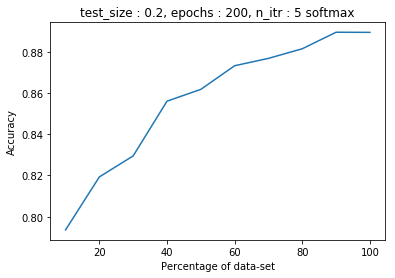

In [17]:
import matplotlib.pyplot as plt
x_axis = [10*i for i in range(1,11)]
title = []
for v in valuesOfTestSize:
    for e in valuesOfEpochs:
        title.append(["test_size : "+str(v),"epochs : " + str(e), "n_itr : " + str(n_itr)])
for i in range(0,len(overAllY)):
    y_axis = overAllY[i]
    plt.plot(x_axis,y_axis)
    plt.xlabel('Percentage of data-set')
    plt.ylabel('Accuracy')
    plt.title(title[i][0]+", "+title[i][1] + ", " + title[i][2]+" softmax")
    filename = "../dataset/bigdata1/result_dnn/graphs_dnn/"+str(title[i][0])+str(title[i][1])+str(title[i][2])+"_softmax"+".png"
    print(filename)
    plt.savefig(filename)
    plt.show()

In [18]:
with open("../dataset/bigdata1/result_dnn/dnn_result_5iterations.txt","a+") as f:
    for i in range(0,len(overAllY)):
        line = str(title[i][0])+", "+ str(title[i][1])+", "+str(title[i][2] + " softmax")
        f.write(line+"\r\n")
        f.write(str(overAllY[i])+"\r\n")